In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

np.set_printoptions(threshold=784,linewidth=np.inf)

In [3]:
def Standard_odd(r,z):

    A = [[0 for j in range(z)] for k in range(z)]

    for i in range(z):
        for j in range(z):
            try:
                if i==j:
                    A[i][j] = ((i+1)**2)
                if abs(i-j) == 1:
                    A[i][j] = -r/2
                else:
                    None
            except:
                None

    return np.array(A)

def Standard_odd_Eigenvec(r: float,z: int ,m: int):
    ''' Requires Standard_odd, m is mth eigenvector of H_0 Matrix, corresponds with mth eigenvalue'''

    A = Standard_odd(r,z)
    A_eigvec = np.linalg.eig(A)
    A_trans = np.transpose(A_eigvec[1])

    return A_trans[m]

def Standard_odd_Eigenval(r: float,z: int,m: int):
    ''' Requires Standard_odd, m it mth eigenvalue of H_0 Matrix, corresponds with mth eigenvector'''

    A = Standard_odd(r,z)
    A_eigval = np.linalg.eig(A)

    return A_eigval[0][m]

In [4]:
Standard__Eigenvec(1,3,0)

array([-0.9867868 , -0.16171494, -0.01000471])

In [5]:
def Standard_even(r:float, z:int):
    '''Independent Function, Creates H_0 Hamiltonian in cosine basis
    r = Value of Gamma, z = Dimension of Matrix'''

    A = [[0 for j in range(z)] for k in range(z)]

    for i in range(z):
        for j in range(z):
            try:
                if i==j:
                    A[i][j] = (i)**2
                if abs(i-j) == 1:
                    A[i][j] = -r/2
                else:
                    None
            except:
                None

    np_A = np.array(A)
    np_A[0][1] = -r/(np.sqrt(2))
    np_A[1][0] = -r/(np.sqrt(2))

    return np_A

def Standard_even_Eigenvec(r: float,z: int ,m: int):
    ''' Requires Standard_even, m is mth eigenvector of H_0 Matrix, corresponds with mth eigenvalue'''

    A = Standard_even(r,z)
    A_eigvec = np.linalg.eig(A)
    A_trans = np.transpose(A_eigvec[1])

    return A_trans[m]

def Standard_even_Eigenval(r: float,z: int,m: int):
    ''' Requires Standard_even, m it mth eigenvalue of H_0 Matrix, corresponds with mth eigenvector'''

    A = Standard_even(r,z)
    A_eigval = np.linalg.eig(A)

    return A_eigval[0][m]

def Elements(d,x,y):

    x_trans = np.transpose(x)

    arr = np.matmul(d,y)
    arr2 = np.matmul(x_trans,arr)

    return arr2

In [6]:
Standard_even_Eigenvec(1,3,0)

array([-0.88040818, -0.47115448, -0.05380427])

In [7]:
def N_test(r,z,m):  
    A = [[0 for i in range(z)] for j in range(z)]

    for i in range(z):
        for j in range(z):
            try:
                if i==j and i%2 == 0:
                    A[i][j+1] = np.matmul(Standard_odd_Eigenvec(r,z,m),Standard_even_Eigenvec(r,z,0))
                    A[i+1][j] = np.matmul(Standard_odd_Eigenvec(r,z,m),Standard_even_Eigenvec(r,z,0))

                if i==j and i%2 == 1:
                    A[i][j+1] = -np.matmul(Standard_odd_Eigenvec(r,z,m),Standard_even_Eigenvec(r,z,1))
                    A[i+1][j] = -np.matmul(Standard_odd_Eigenvec(r,z,m),Standard_even_Eigenvec(r,z,1))

            except:
                None

    return np.array(A)

In [8]:
def Hamiltonian_Matrix(r: float,z: int,g: float,omega: float):
    '''Return Hamiltonian H in matrix form, requires prerequisites,
    r : Value of Gamma, z : dimension of Matrix, g : coupling strength, omega : frequency '''

    #Matrix Elements
    eig_even_gs = Standard_even_Eigenval(r,2,0)
    eig_even_2n = Standard_even_Eigenval(r,2,1)
    eig_odd = Standard_odd_Eigenval(r,2,0)

    Diag_gs_to_1s = np.matmul(Standard_odd_Eigenvec(r,z,0),Standard_even_Eigenvec(r,z,0))
    Diag_1s_to_2n = -np.matmul(Standard_odd_Eigenvec(r,z,0),Standard_even_Eigenvec(r,z,1))

    #Matrix
    A = [[0 for i in range(z)] for j in range(z)]

    for i in range(z):
        for j in range(z):
            try:
                if i==j and i%3 == 0:
                   A[i][j+4] = g*Diag_gs_to_1s*(np.sqrt((j+4)//3))
                if i==j and i%3 == 1:
                    A[i][j+2] = (np.sqrt((j+2)//3))*g*Diag_gs_to_1s
                    A[i][j+4] = (np.sqrt((j+4)//3))*g*Diag_1s_to_2n
                if i==j and i%3 == 2:
                    A[i][j+2] = g*Diag_1s_to_2n*(np.sqrt((j+2)//3))
            except:
                None

    np_A = np.array(A)
    np_B = np.transpose(np_A.copy())

    for i in range(z):
        for j in range(z):
            try:
                if i==j and i%3==0:
                    A[i][j] = eig_even_gs+(j//3)*omega
                elif i==j and i%3==1:
                    A[i][j] = eig_odd+(j//3)*omega
                elif i==j and i%3==2:
                    A[i][j] = eig_even_2n+(j//3)*omega
                else:
                    A[i][j] = 0
            except:
                None
    
    np_C = np.array(A)
    Array = np_A + np_B + np_C

    return Array

def Hamiltonian_Matrix_Eigenval(r,z,g,omega,i):
    A_eigval = np.linalg.eig(Hamiltonian_Matrix(r,z,g,omega))[0][i]
    return A_eigval

def Hamiltonian_Matrix_Eigenvec(r,z,g,omega,i):
    A = np.linalg.eig(Hamiltonian_Matrix(r,z,g,omega))[1].T
    A_eigvec = A[i]
    return A_eigvec

## Main Hamiltonian ##########################

## Pauil Matrix ##########################
def Pauli(x):
    sigma = [[0 for i in range(2)] for j in range(2)]

    if x == 1:
        sigma[0][1] = 1
        sigma[1][0] = 1
        return np.array(sigma)
    if x == 2: 
        sigma[0][1] = 1j
        sigma[1][0] = -1j
        return np.array(sigma)
    if x == 3:
        sigma[0][0] = 1
        sigma[1][1] = 1
        return np.array(sigma)
    
    
def Pauli_tensorproduct(x,y):
    A = np.identity(y)
    Pauli_Tens = np.kron(A,Pauli(x))
    return Pauli_Tens


In [9]:
Hamiltonian_Matrix(1,6,1,1)

array([[-0.3660254 ,  0.        ,  0.        ,  0.        , -0.94546366,  0.        ],
       [ 0.        ,  0.91886117,  0.        , -0.94546366,  0.        , -0.32551571],
       [ 0.        ,  0.        ,  1.3660254 ,  0.        , -0.32551571,  0.        ],
       [ 0.        , -0.94546366,  0.        ,  0.6339746 ,  0.        ,  0.        ],
       [-0.94546366,  0.        , -0.32551571,  0.        ,  1.91886117,  0.        ],
       [ 0.        , -0.32551571,  0.        ,  0.        ,  0.        ,  2.3660254 ]])

In [10]:
def Lie_group(x):
    sigma = [[0 for i in range(3)] for j in range(3)]

    if x == 1:
        sigma[0][1] = 1
        sigma[1][0] = 1
        return np.array(sigma)
    if x == 2: 
        sigma[0][1] = 1j
        sigma[1][0] = -1j
        return np.array(sigma)
    if x == 3:
        sigma[0][0] = 1
        sigma[1][1] = 1
        return np.array(sigma)
    if x == 4:
        sigma[0][2] = 1
        sigma[2][0] = 1
        return np.array(sigma)
    if x == 5:
        sigma[0][2] = -1j
        sigma[2][0] = 1j
        return np.array(sigma)
    if x == 6:
        sigma[1][2] = 1
        sigma[2][1] = 1
        return np.array(sigma)
    if x == 7:
        sigma[1][2] = -1j
        sigma[2][1] = 1j
        return np.array(sigma)
    if x == 8:
        sigma[0][0] = 1/(3**0.5)
        sigma[2][2] = -2/(3**0.5)
        return np.array(sigma)

def Lie_tensorproduct(x,y):
    A = np.identity(y)
    Lie_Tens = np.kron(A,Lie_group(x))
    return Lie_Tens

In [11]:
def Spectral_Function(beta: float,r:float ,z: int,g: float,matsufreq: float,eta:float,omega: float):
    '''Spectral Density of Correlation_Function. r = Value of gamma, z = dimension/2 of Matrix,
    g = Coupling strength, matsufreq = Matsubara frequency of given Function, eta = Value for analytic continuation'''
    Zet = []
    for i in range(2):
        Zet.append(sp.linalg.expm(-beta*Standard_even(r,2))[i][i])
    Z_sum = np.sum(np.array(Zet))
    print(Z_sum)

    A = []
    
    for i in range(2*z):
        for j in range(2*z):
            expec = (Elements(Pauli_tensorproduct(1,z),Hamiltonian_Matrix_Eigenvec(r,2*z,g,omega,i),Hamiltonian_Matrix_Eigenvec(r,2*z,g,omega,j)))        
            conju = np.conjugate(expec)

            n = Hamiltonian_Matrix_Eigenval(r,2*z,g,omega,i)
            m = Hamiltonian_Matrix_Eigenval(r,2*z,g,omega,j)

            denom = (matsufreq + n - m)**2 + eta**2
            #sign of numerator e^E_m may can change 
            numer = np.exp(-beta*n)-np.exp(-beta*m)
            value = (conju*expec*numer*2*eta)/denom
            print(value)
            #if i==2 and j==1:
                #print(value)
            A.append(value)
            
    np_A = np.array(A)
    sum_A = np.sum(np_A)

    return sum_A/Z_sum


In [12]:
def Spectral_Function(beta: float,r:float ,z: int,g: float,matsufreq: float,eta:float,omega: float):
    '''Spectral Density of Correlation_Function. r = Value of gamma, z = dimension/2 of Matrix,
    g = Coupling strength, matsufreq = Matsubara frequency of given Function, eta = Value for analytic continuation'''
    
    # Tr Z
    eig_val = np.array([[Standard_even_Eigenval(r,2,0),0,0],
         [0,Standard_odd_Eigenval(r,2,0),0],
         [0,0,Standard_even_Eigenval(r,2,1)]])
    exp_val = sp.linalg.expm(-beta*eig_val)
    Z = np.sum(np.array(exp_val))

    # Spectral
    A = []
    for i in range(3*z):
        for j in range(3*z):
            expec_nm = Elements(Lie_tensorproduct(1,z),Hamiltonian_Matrix_Eigenvec(r,3*z,g,omega,i),Hamiltonian_Matrix_Eigenvec(r,3*z,g,omega,j))
            conju = np.conjugate(expec_nm)

            n = Hamiltonian_Matrix_Eigenval(r,3*z,g,omega,i)
            m = Hamiltonian_Matrix_Eigenval(r,3*z,g,omega,j)

            denom = (matsufreq + n - m)**2 + eta**2
            #sign of numerator e^E_m may can change 
            numer = np.exp(-beta*n)-np.exp(-beta*m)
            value = (conju*expec_nm*numer*2*eta)/denom

            #print(denom)

            A.append(value)
                    
    #np.imag() was not used.
    np_A = np.array(A)
    sum_A = np.sum(np_A)

    return sum_A/Z


In [13]:
Spectral_Function(1,0,2,1,1.2,0.01,1)

0.009116838097486252

In [14]:
def plotting(r,g):
    A =[]
    om = np.linspace(0,0.1,1000)

    for i in range(len(om)):
        H = Spectral_Function(10,r,2,g,om[i],0.01,2.22)
        A.append(H)
    
    return(A)

def plotting2(r,g):
    A =[]
    om = np.linspace(-2,5,1000)

    for i in range(len(om)):
        H = Spectral_Function(1,r,2,g,om[i],0.01,1)
        A.append(H)
    
    return(A)

In [15]:
om = np.linspace(-2,5,1000)

plt.plot(om,plotting(0,0))
plt.plot(om,plotting(2,0),color='blue')
print(np.max(plotting(2,0)))

plt.plot(om,plotting2(0,0))
plt.plot(om,plotting2(2,0),color='red')
print(np.max(plotting2(2,0)))

plt.show()

In [ ]:
print(np.argmax(plotting(0,0)))
print(np.argmax(plotting2(0,0)))

print(np.argmax(plotting(2,0)))
print(np.argmax(plotting2(2,0)))

428
428
528
528


In [ ]:
print(om[428])
print(om[528])

0.9989989989989989
1.6996996996996998


In [ ]:
def plotting(r,g):
    A =[]
    om = np.linspace(0,0.1,1000)

    for i in range(len(om)):
        H = Spectral_Function(10,r,2,g,om[i],0.01,2.22)
        A.append(H)
    
    return(A)

In [ ]:
om = np.linspace(0,5,1000)

plt.figure(figsize=(12,8))

plt.plot(om,plotting(2,0),label='g=0')
plt.plot(om,plotting(2,0.2),label='g=0.2')
plt.plot(om,plotting(2,0.5),label='g=0.5')
plt.plot(om,plotting(2,0.7),label='g=0.7')
plt.plot(om,plotting(2,0.9),label='g=0.9')
plt.plot(om,plotting(2,1),label='g=1')
#plt.plot(om,plotting(1,2),label='g=3')
#plt.plot(om,plotting(0,1.4114285714285713)p,label='g~1.411')

plt.legend()
plt.show()

In [ ]:
def plotting(r,g):
    A =[]
    om = np.linspace(0,5,1000)

    for i in range(len(om)):
        H = Spectral_Function(10,r,2,g,om[i],0.01,0.06)
        A.append(H)
    
    return(A)

def plotting2(r,g):
    A =[]
    om = np.linspace(0,5,1000)

    for i in range(len(om)):
        H = Spectral_Function(10,r,2,g,om[i],0.01,2.22)
        A.append(H)
    
    return(A)
def plotting3(r,g):
    A =[]
    om = np.linspace(0,5,1000)

    for i in range(len(om)):
        H = Spectral_Function(10,r,2,g,om[i],0.01,0.06)
        A.append(H)
    
    return(A)
def plotting4(r,g):
    A =[]
    om = np.linspace(0,5,1000)

    for i in range(len(om)):
        H = Spectral_Function(10,r,2,g,om[i],0.01,2.22)
        A.append(H)
    
    return(A)

om = np.linspace(0,5,1000)

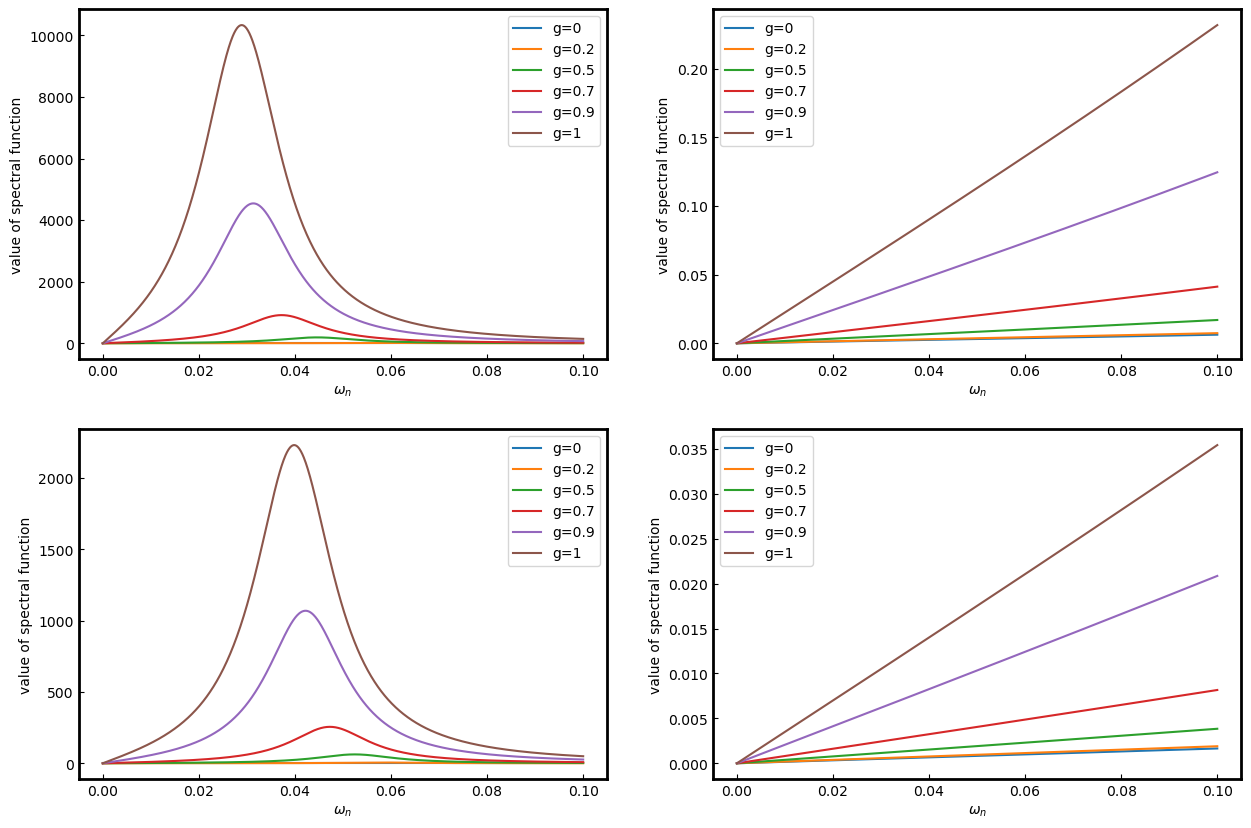

In [ ]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    nrows=2, ncols=2,
    sharex=False, figsize=(15, 10),
)

ax1.plot(om,plotting(0.5,0),label='g=0')
ax1.plot(om,plotting(0.5,0.2),label='g=0.2')
ax1.plot(om,plotting(0.5,0.5),label='g=0.5')
ax1.plot(om,plotting(0.5,0.7),label='g=0.7')
ax1.plot(om,plotting(0.5,0.9),label='g=0.9')
ax1.plot(om,plotting(0.5,1),label='g=1')
ax1.tick_params(axis='x',direction='in')
ax1.tick_params(axis='y',direction='in')
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['top'].set_linewidth(2)
ax1.set_xlabel(r'$\omega_n$')
ax1.set_ylabel('value of spectral function')
ax1.legend(loc='upper left')

ax2.plot(om,plotting2(0.5,0),label='g=0')
ax2.plot(om,plotting2(0.5,0.2),label='g=0.2')
ax2.plot(om,plotting2(0.5,0.5),label='g=0.5')
ax2.plot(om,plotting2(0.5,0.7),label='g=0.7')
ax2.plot(om,plotting2(0.5,0.9),label='g=0.9')
ax2.plot(om,plotting2(0.5,1),label='g=1')
ax2.tick_params(axis='x',direction='in')
ax2.tick_params(axis='y',direction='in')
ax2.spines['left'].set_linewidth(2)
ax2.spines['right'].set_linewidth(2)
ax2.spines['bottom'].set_linewidth(2)
ax2.spines['top'].set_linewidth(2)
ax2.set_xlabel(r'$\omega_n$')
ax2.set_ylabel('value of spectral function')
ax2.legend(loc='upper left')

ax3.plot(om,plotting3(2,0),label='g=0')
ax3.plot(om,plotting3(2,0.2),label='g=0.2')
ax3.plot(om,plotting3(2,0.5),label='g=0.5')
ax3.plot(om,plotting3(2,0.7),label='g=0.7')
ax3.plot(om,plotting3(2,0.9),label='g=0.9')
ax3.plot(om,plotting3(2,1),label='g=1')
ax3.tick_params(axis='x',direction='in')
ax3.tick_params(axis='y',direction='in')
ax3.spines['left'].set_linewidth(2)
ax3.spines['right'].set_linewidth(2)
ax3.spines['bottom'].set_linewidth(2)
ax3.spines['top'].set_linewidth(2)
ax3.set_xlabel(r'$\omega_n$')
ax3.set_ylabel('value of spectral function')
ax3.legend(loc='upper left')

ax4.plot(om,plotting4(2,0),label='g=0')
ax4.plot(om,plotting4(2,0.2),label='g=0.2')
ax4.plot(om,plotting4(2,0.5),label='g=0.5')
ax4.plot(om,plotting4(2,0.7),label='g=0.7')
ax4.plot(om,plotting4(2,0.9),label='g=0.9')
ax4.plot(om,plotting4(2,1),label='g=1')
ax4.tick_params(axis='x',direction='in')
ax4.tick_params(axis='y',direction='in')
ax4.spines['left'].set_linewidth(2)
ax4.spines['right'].set_linewidth(2)
ax4.spines['bottom'].set_linewidth(2)
ax4.spines['top'].set_linewidth(2)
ax4.set_xlabel(r'$\omega_n$')
ax4.set_ylabel('value of spectral function')
ax4.legend(loc='upper left')

plt.show()

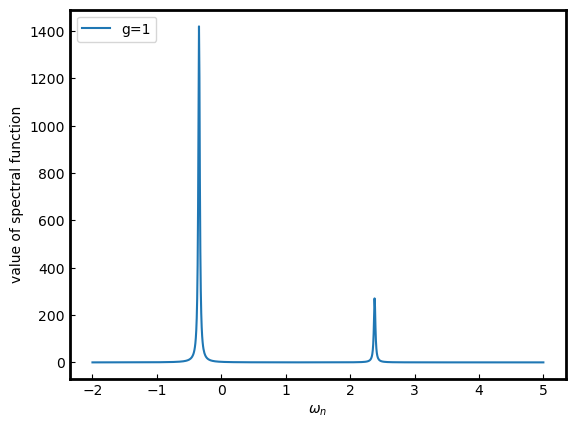

In [ ]:
fig = plt.figure()
ax = fig.subplots()

ax.plot(om,plotting4(2,1),label='g=1')
ax.tick_params(axis='x',direction='in')
ax.tick_params(axis='y',direction='in')
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.set_xlabel(r'$\omega_n$')
ax.set_ylabel('value of spectral function')
ax.text(1,800'')


ax.legend(loc='upper left')

plt.show()